### Парсинг сайта Кинопоиск

In [42]:
import pandas as pd
import requests

In [163]:
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from time import sleep
from tqdm import tqdm, trange, tqdm_notebook
from tqdm.notebook import tqdm

In [645]:
import re

In [ ]:
import datetime
from datetime import timedelta

In [1037]:
driver = webdriver.Chrome()
driver.maximize_window()
driver2 = webdriver.Chrome()
driver2.maximize_window()

In [1038]:
with open('movies_top500.csv','w',encoding='utf-8') as mi:       # Открываем файл на запись
    mi.write('name | country | year | link | ganre | description | time | rating | research_date | page | number\n')
    url_page = 1
    count_page = 10                    # !!! Обязательно указать количество страниц
    while url_page <= count_page:
        for u in tqdm(range(1),desc=f'page number {url_page}',mininterval=0.01,position=0):
            k = 1
            time_now = datetime.datetime.now()
            time_str = datetime.datetime.strftime(time_now, '%Y,%m,%d')
            research_date = datetime.datetime.strptime(time_str,'%Y,%m,%d')
            url_online = f'https://www.kinopoisk.ru/lists/movies/top500/?page={url_page}'  # !!! Необходимо взять актуальную ссылку для корректной работы
            try:
                driver.get(url_online)
                sleep(2)
                blocks = driver.find_element(By.TAG_NAME, 'main')
                posts = blocks.find_elements(By.CLASS_NAME, 'styles_upper__j8BIs')
            except:
                mi.close()
                break
            
            for post in posts:
                link = post.find_element(By.CLASS_NAME, 'styles_main__Y8zDm').find_element(By.TAG_NAME, 'a').get_attribute('href')
                try:
                    driver2.get(link)
                    sleep(1)
                except:
                    pass
                try:
                    blocks_inner = driver2.find_element(By.TAG_NAME, 'main')
                    posts_inner = blocks_inner.find_element(By.CLASS_NAME, 'styles_paragraph__wEGPz').text
                except:
                    posts_inner = 'None'
                name = post.find_element(By.TAG_NAME, 'a').find_element(By.TAG_NAME, 'span').text
                try:
                    t = post.find_element(By.CLASS_NAME, 'styles_main__Y8zDm').find_element(By.CLASS_NAME, 'desktop-list-main-info_truncatedText__IMQRP').text
                except:
                    pass
                try:
                    country = re.search(r'(^.*)(\s)(•)(\s)(.*)(\s)(\s)(Режиссёр)',t).groups()[0]
                except:
                    try:
                        country = re.search(r'(^.*)(\s)(•)(\s)(.*)',t).groups()[0]
                    except:
                        try:
                            country = re.search(r'([А-Я]\w*)(\s+)( Режиссёр)',t).groups()[0]
                        except:
                            country = 'None'
                try:
                    ganre = re.search(r'(^.*)(\s)(•)(\s)(.*)(\s)(\s)(Режиссёр)',t).groups()[4]
                except:
                    try:
                        ganre = re.search(r'(^.*)(\s)(•)(\s)(.*)',t).groups()[4]
                    except:
                        try:
                            ganre = re.search(r'([а-я]\w*)(\s+)( Режиссёр)',inform4).groups()[0]
                        except:
                            ganre = 'None'
                try:
                    rating = post.find_element(By.CLASS_NAME, 'styles_kinopoiskValuePositive__vOb2E').text
                except:
                    try:
                        rating = post.find_element(By.CLASS_NAME, 'styles_kinopoiskValueNeutral__sW9QT').text
                    except:
                        try:
                            rating = post.find_element(By.CLASS_NAME, 'styles_kinopoiskValueNegative__Y75Rz').text
                        except:
                            rating = 'None'
                try:
                    j = post.find_element(By.CLASS_NAME, 'desktop-list-main-info_secondaryTitleSlot__mc0mI').find_element(By.CLASS_NAME, 'desktop-list-main-info_secondaryText__M_aus').text
                except:
                    pass
                try:
                    year = re.search(r'(\d{4})(\s*,\s*)(\d*)',j).groups()[0]
                except:
                    try:
                        year = re.search(r'(\d{4})',j).groups()[0]
                    except:
                        year = 'None'
                try:
                    time = re.search(r'(\d{4})(\s*,\s*)(\d*)',j).groups()[2]
                except:
                    time = 'None'
                mi.write(f'{name}|{country}|{year}|{link}|{ganre}|{posts_inner}|{time}|{rating}|{research_date}|{url_page}|{k}\n')
                k += 1
        url_page += 1
    mi.close()
    print('Парсинг сайта окончен. Все данные сохранены в файле "movies_top500.csv"')

page number 1:   0%|          | 0/1 [00:00<?, ?it/s]

page number 2:   0%|          | 0/1 [00:00<?, ?it/s]

page number 3:   0%|          | 0/1 [00:00<?, ?it/s]

page number 4:   0%|          | 0/1 [00:00<?, ?it/s]

page number 5:   0%|          | 0/1 [00:00<?, ?it/s]

page number 6:   0%|          | 0/1 [00:00<?, ?it/s]

page number 7:   0%|          | 0/1 [00:00<?, ?it/s]

page number 8:   0%|          | 0/1 [00:00<?, ?it/s]

page number 9:   0%|          | 0/1 [00:00<?, ?it/s]

page number 10:   0%|          | 0/1 [00:00<?, ?it/s]

In [1047]:
movies_top500 = pd.read_csv('movies_top500.csv',sep='|', encoding='utf-8')
movies_top500.head(5)

,name,country,year,link,ganre,description,time,rating,research_date,page,number
0,Зеленая миля,США,1999,https://www.kinopoisk.ru/film/435/,драма,Пол Эджкомб — начальник блока смертников в тюр...,189,9.2,2023-08-22 00:00:00,1,1
1,Побег из Шоушенка,США,1994,https://www.kinopoisk.ru/film/326/,драма,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,142,9.0,2023-08-22 00:00:00,1,2
2,Форрест Гамп,США,1994,https://www.kinopoisk.ru/film/448/,драма,"Сидя на автобусной остановке, Форрест Гамп — н...",142,9.0,2023-08-22 00:00:00,1,3
3,Список Шиндлера,США,1993,https://www.kinopoisk.ru/film/329/,драма,Фильм рассказывает реальную историю загадочног...,195,9.0,2023-08-22 00:00:00,1,4
4,1+1,Франция,2011,https://www.kinopoisk.ru/film/535341/,драма,"Пострадав в результате несчастного случая, бог...",112,8.9,2023-08-22 00:00:00,1,5


In [1050]:
movies_top500.columns

Index(['name ', ' country ', ' year ', ' link ', ' ganre ', ' description ',
       ' time ', ' rating ', ' research_date ', ' page ', ' number'],
      dtype='object')

In [1056]:
movies_top500.columns = ['name', 'country', 'year', 'link', 'ganre', 'description','time', 'rating', 'research_date', 'page', 'number']

In [1061]:
movies_top500.name.unique()

array(['Зеленая миля', 'Побег из Шоушенка', 'Форрест Гамп',
       'Список Шиндлера', '1+1', 'Властелин колец: Возвращение короля',
       'Тайна Коко', 'Интерстеллар', 'Бойцовский клуб',
       'Унесённые призраками', 'Криминальное чтиво',
       'Иван Васильевич меняет профессию',
       'Властелин колец: Братство Кольца',
       'Властелин колец: Две крепости',
       'Приключения Шерлока Холмса и доктора Ватсона: Собака Баскервилей',
       'Король Лев', 'Шрэк', 'Назад в будущее',
       'Шерлок Холмс и доктор Ватсон: Знакомство', 'Достучаться до небес',
       'Москва слезам не верит', 'Джентльмены удачи',
       'Терминатор 2: Судный день', 'Остров проклятых', 'Ходячий замок',
       'Гарри Поттер и узник Азкабана', 'Девчата',
       'Операция «Ы» и другие приключения Шурика', 'ВАЛЛ·И',
       'Темный рыцарь', 'Джентльмены', '...А зори здесь тихие',
       'Они сражались за Родину', 'Начало',
       'Гарри Поттер и философский камень', 'Леон',
       'Поймай меня, если сможешь',


In [1016]:
movies_top500.time.unique()

array([189, 142, 195, 112, 201, 105, 169, 139, 125, 154,  88, 178, 179,
        90, 116,  68,  87, 150,  84, 137, 138, 119,  92,  95,  98, 152,
       113, 160, 148, 133, 141, 143, 136,  96, 104, 194,  94, 155, 130,
        82, 103, 161,  89,  91,  93, 159, 100, 107, 127,  86, 140, 165,
       149, 146,  97, 134, 108, 151, 111, 175, 106, 144, 126, 180, 157,
       156,  80, 183, 202, 109, 153, 118, 102, 131,  65, 117, 110, 120,
       101,  59, 135, 124, 115, 132,  71, 128, 129, 162, 121,  78,  66,
       222, 168,  83,  81,  79,  85,  76, 166, 122, 184, 164, 123, 181,
       114, 163,  60,  75, 170,  69,  99,  74,  53, 229, 350, 158,  46,
       147, 187, 171,  49], dtype=int64)

In [1063]:
import matplotlib.pyplot as plt

драма


<Figure size 640x480 with 0 Axes>

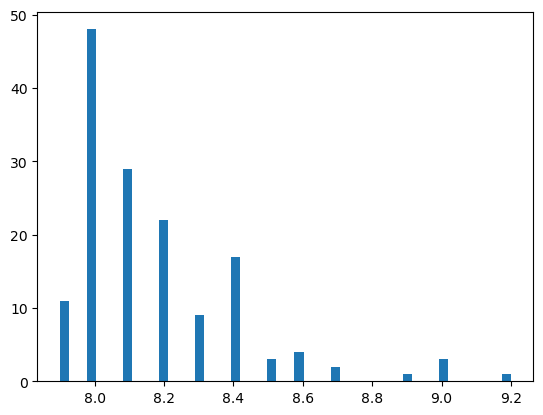

фэнтези


<Figure size 640x480 with 0 Axes>

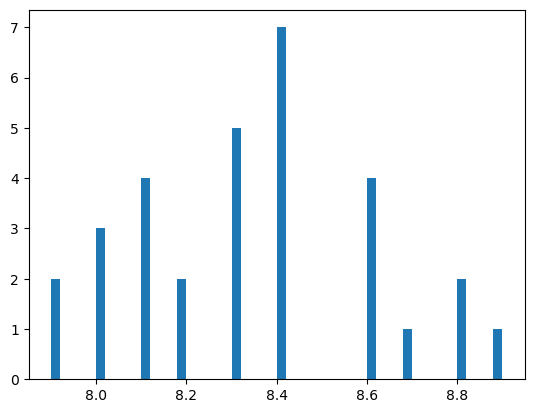

мультфильм


<Figure size 640x480 with 0 Axes>

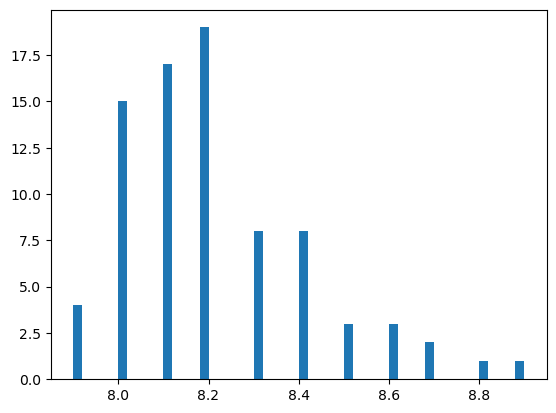

фантастика


<Figure size 640x480 with 0 Axes>

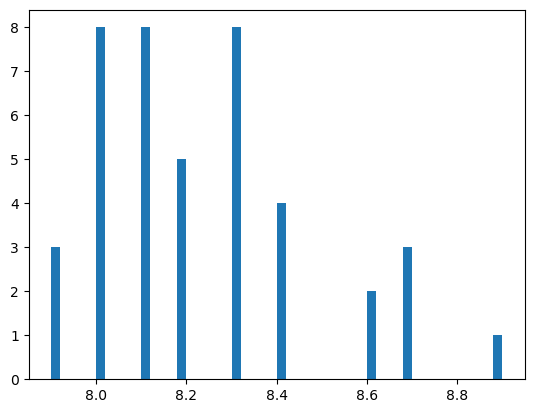

триллер


<Figure size 640x480 with 0 Axes>

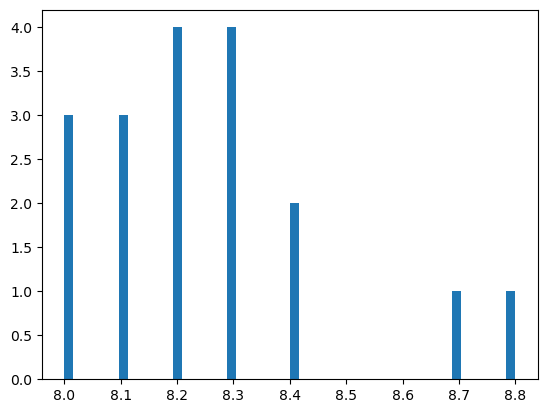

аниме


<Figure size 640x480 with 0 Axes>

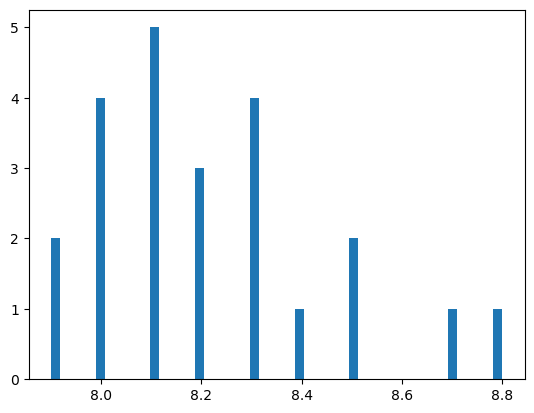

криминал


<Figure size 640x480 with 0 Axes>

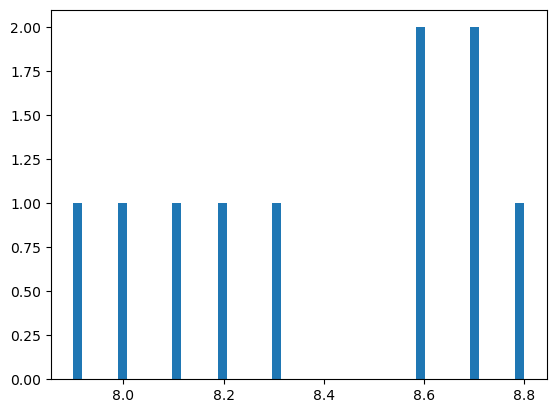

комедия


<Figure size 640x480 with 0 Axes>

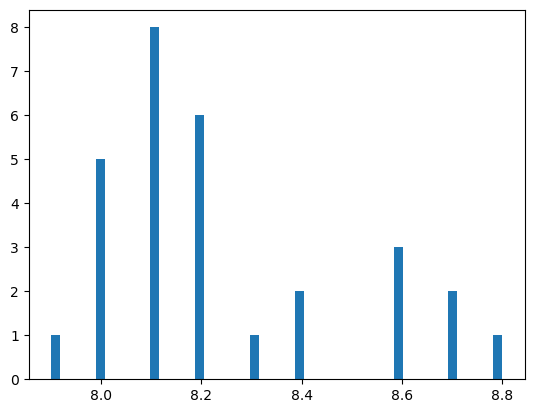

детектив


<Figure size 640x480 with 0 Axes>

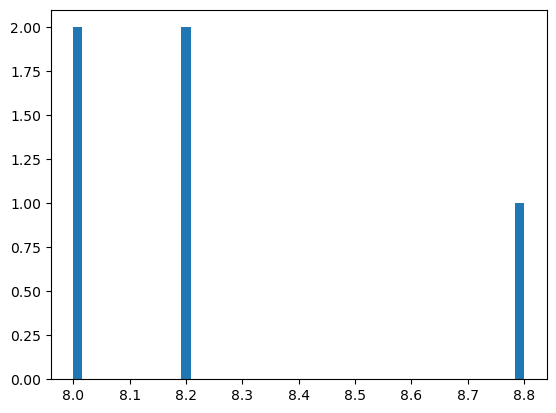

мелодрама


<Figure size 640x480 with 0 Axes>

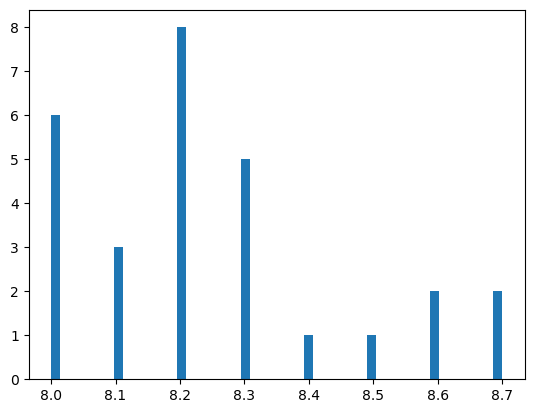

боевик


<Figure size 640x480 with 0 Axes>

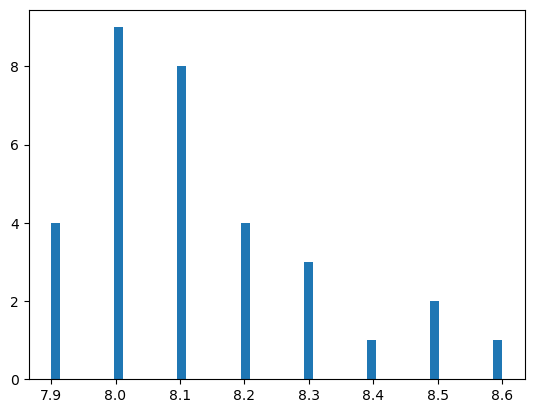

история


<Figure size 640x480 with 0 Axes>

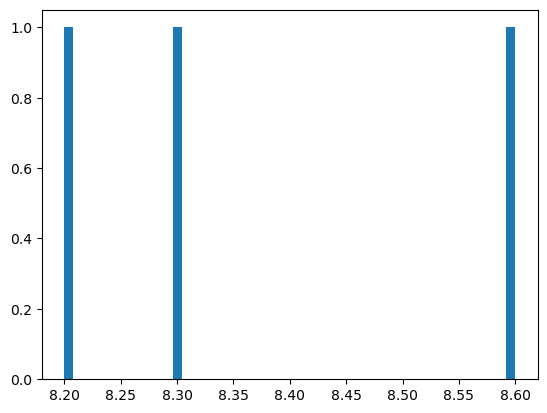

биография


<Figure size 640x480 with 0 Axes>

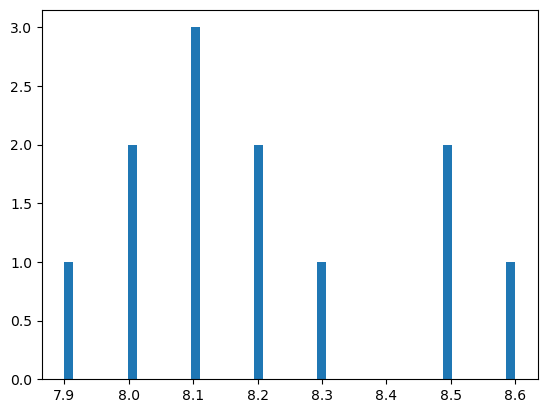

военный


<Figure size 640x480 with 0 Axes>

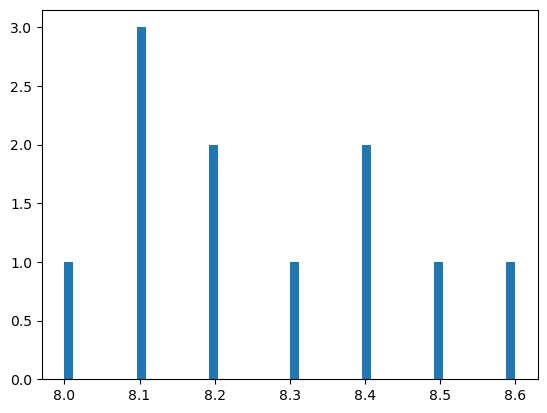

вестерн


<Figure size 640x480 with 0 Axes>

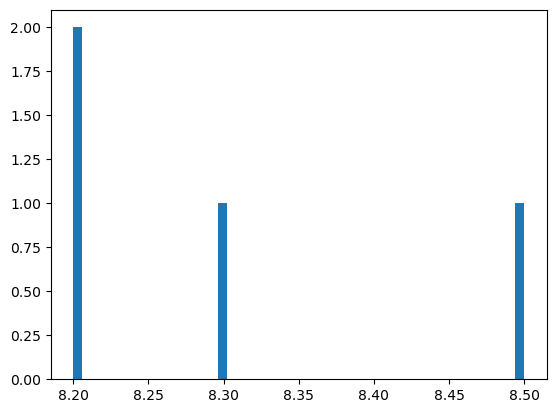

приключения


<Figure size 640x480 with 0 Axes>

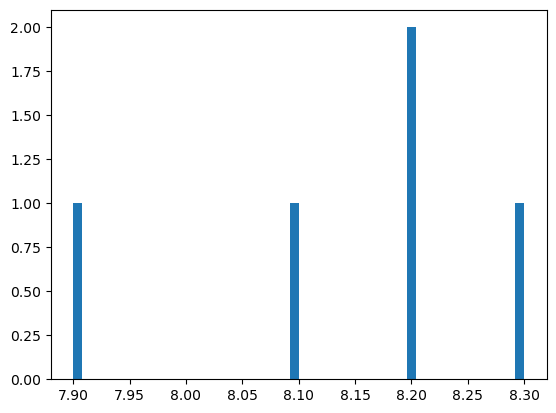

мюзикл


<Figure size 640x480 with 0 Axes>

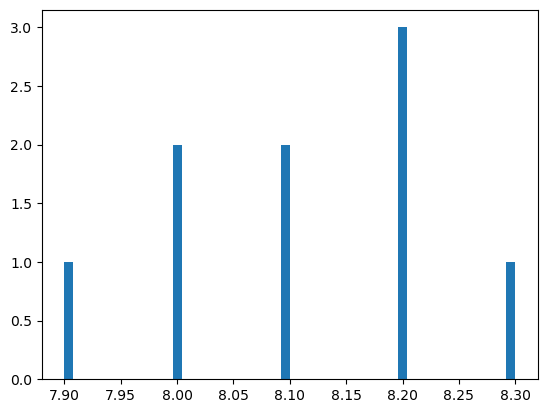

семейный


<Figure size 640x480 with 0 Axes>

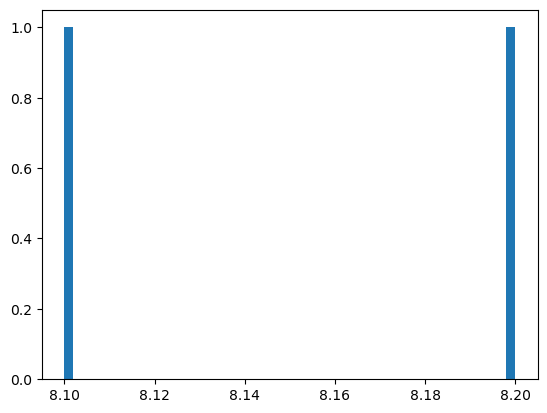

ужасы


<Figure size 640x480 with 0 Axes>

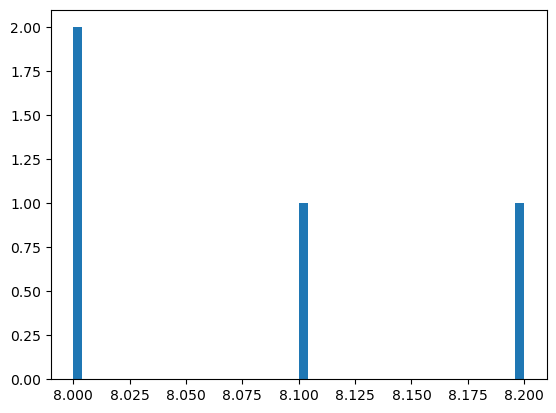

спорт


<Figure size 640x480 with 0 Axes>

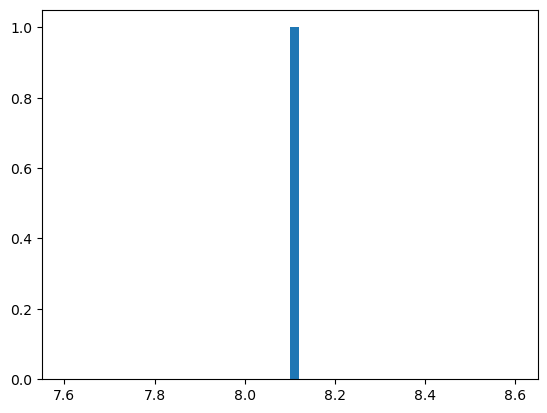

In [1105]:
for x in movies_top500.ganre.unique():
    print(x)
    plt.figure()
    plt.show()
    result = plt.hist(movies_top500[movies_top500.ganre == x].rating,50)
    plt.show()

In [1131]:
import seaborn as sns

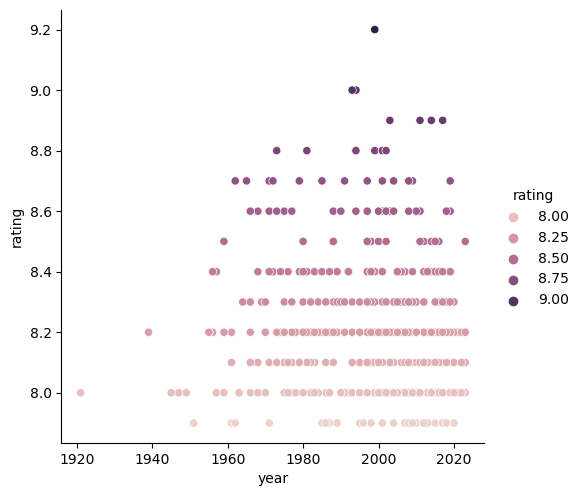

In [1145]:
sns.pairplot(movies_top500[['rating','year']], y_vars='rating',hue='rating', height=5)

In [1147]:
def ganre_identification(data):
    for i, j in enumerate(movies_top500.ganre.unique()):
        if data == j:
            return i

In [1149]:
movies_top500['ganre_identification'] = movies_top500.ganre.apply(ganre_identification)

In [1158]:
movies_top500.tail(10)

,name,country,year,link,ganre,description,time,rating,research_date,page,number,ganre_identification
490,Трансформеры,США,2007,https://www.kinopoisk.ru/film/81288/,фантастика,В течение многих столетий две расы роботов-ино...,143,7.9,2023-08-22 00:00:00,10,41,3
491,Чтец,США,2008,https://www.kinopoisk.ru/film/325439/,драма,"Майкл Берг, 52-летний закрытый в себе адвокат,...",124,7.9,2023-08-22 00:00:00,10,42,0
492,Невероятная жизнь Уолтера Митти,США,2013,https://www.kinopoisk.ru/film/6034/,комедия,Уолтер Митти — сотрудник отдела иллюстраций жу...,114,7.9,2023-08-22 00:00:00,10,43,7
493,Охота,Дания,2012,https://www.kinopoisk.ru/film/647671/,драма,42-летний Лукас живет в небольшой датской дере...,115,7.9,2023-08-22 00:00:00,10,44,0
494,Сёстры,Россия,2001,https://www.kinopoisk.ru/film/41109/,драма,"Дина и Света ненавидят друг друга, хотя в них ...",83,7.9,2023-08-22 00:00:00,10,45,0
495,Английский пациент,США,1996,https://www.kinopoisk.ru/film/7636/,драма,Вторая мировая война близится к концу. Молодая...,162,7.9,2023-08-22 00:00:00,10,46,0
496,Беглецы,Франция,1986,https://www.kinopoisk.ru/film/20897/,драма,Нескладный грабитель банка захватывает в залож...,95,7.9,2023-08-22 00:00:00,10,47,0
497,Хористы,Франция,2004,https://www.kinopoisk.ru/film/51481/,драма,"Франция, 1949 год. Отчаявшись найти работу, уч...",95,7.9,2023-08-22 00:00:00,10,48,0
498,Звездный путь,США,2009,https://www.kinopoisk.ru/film/255129/,фантастика,Когда Нерон с планеты Ромул приходит из будуще...,127,7.9,2023-08-22 00:00:00,10,49,3
499,Проверка на дорогах,СССР,1971,https://www.kinopoisk.ru/film/43332/,драма,Зима 1942 года. В одной из северо-западных обл...,97,7.9,2023-08-22 00:00:00,10,50,0


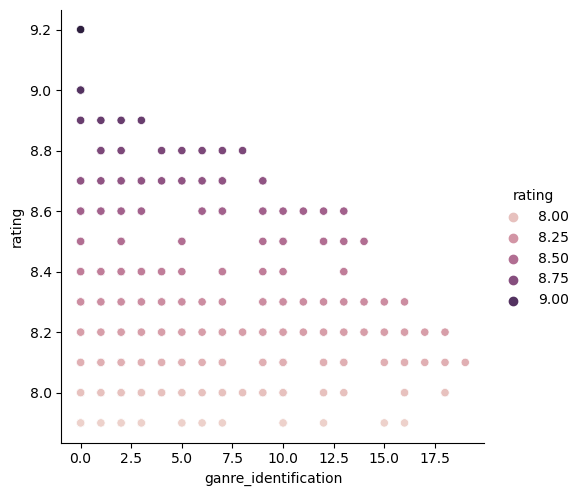

In [1163]:
sns.pairplot(movies_top500[['rating','ganre_identification']], y_vars='rating', hue='rating', height=5)

In [1169]:
movies_top500.groupby('ganre').mean().reset_index().sort_values('ganre_identification')[['ganre','ganre_identification']]

,ganre,ganre_identification
6,драма,0.0
19,фэнтези,1.0
11,мультфильм,2.0
18,фантастика,3.0
16,триллер,4.0
0,аниме,5.0
9,криминал,6.0
8,комедия,7.0
5,детектив,8.0
10,мелодрама,9.0


In [1130]:
movies_top500.to_excel('movies_top500.xlsx')